# Artificial Neural Networks and Deep Learning

---

## Homework 1: Minimal Working Example

To make your first submission, follow these steps:
1. Create a folder named `[2024-2025] AN2DL/Homework 1` in your Google Drive.
2. Upload the `training_set.npz` file to this folder.
3. Upload the Jupyter notebook `Homework 1 - Minimal Working Example.ipynb`.
4. Load and process the data.
5. Implement and train your model.
6. Submit the generated `.zip` file to Codabench.


## 🌐 Connect Colab to Google Drive

In [ ]:
from google.colab import drive

drive.mount('/gdrive')
%cd /gdrive/My Drive/Colab Notebooks

Mounted at /gdrive
/gdrive/My Drive/Colab Notebooks


## ⚙️ Import Libraries

In [ ]:
import numpy as np

import tensorflow as tf
from tensorflow import keras as tfk
from tensorflow.keras import layers as tfkl

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

np.random.seed(42)
tf.random.set_seed(42);
seed=42

## ⏳ Load the Data

In [ ]:
file_path = "training_set.npz"
data = np.load(file_path)
print(data.keys())

KeysView(NpzFile 'training_set.npz' with keys: images, labels)


In [ ]:
# Assuming the dataset contains images under the key 'images' and labels under 'labels':
images = data['images']
labels = data['labels']

# Check the shape of the dataset
print("Shape of images:", images.shape)
print("Shape of labels:", labels.shape)

Shape of images: (13759, 96, 96, 3)
Shape of labels: (13759, 1)


## 🔎 Inspect Data

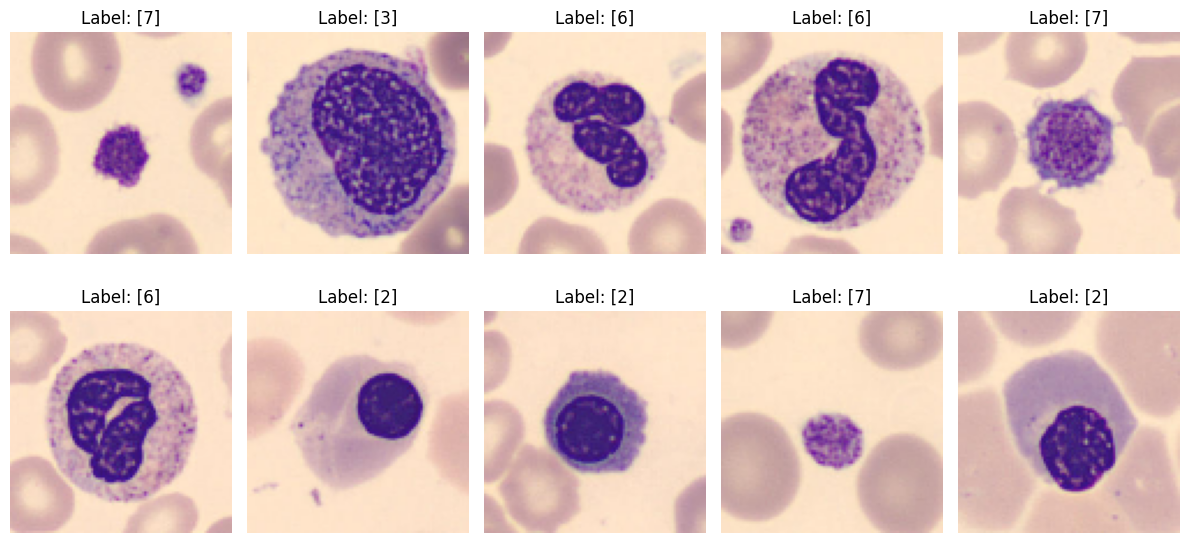

In [ ]:
# Number of images to display and grid dimensions
N = 10
rows, cols = 2, 5

# Create a figure with subplots
fig, axes = plt.subplots(rows, cols, figsize=(12, 6))

# Iterate through the grid and display each image with its label
for i in range(N):
    row = i // cols
    col = i % cols
    axes[row, col].imshow(images[i], cmap='gray')  # Use cmap='gray' for grayscale images, remove for RGB
    axes[row, col].set_title(f"Label: {labels[i]}")
    axes[row, col].axis('off')  # Hide axes

# Adjust layout to prevent overlapping titles
plt.tight_layout()
plt.show()

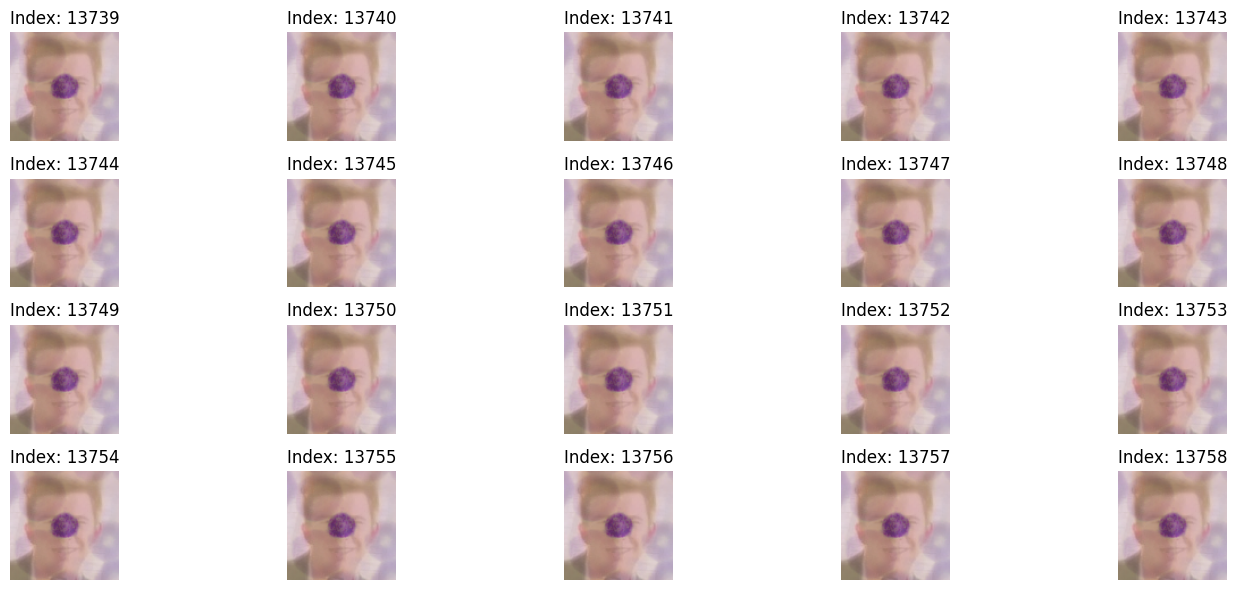

In [ ]:
# Function to display the last 20 images in the dataset
def display_last_20_images(images):
    last_20_start_idx = max(0, len(images) - 20)  # Ensure we start from 0 if there are fewer than 20 images
    num_images = len(images[last_20_start_idx:])

    plt.figure(figsize=(15, 6))

    for i in range(num_images):
        plt.subplot(4, 5, i + 1)  # Arrange in 4 rows and 5 columns
        plt.imshow(images[last_20_start_idx + i].astype('uint8'))
        plt.title(f"Index: {last_20_start_idx + i}")
        plt.axis('off')

    plt.tight_layout()
    plt.show()

# Display the last 20 images
display_last_20_images(images)

In [ ]:
# Specify the cutoff index
cutoff_idx = 11959

# Trim the images and labels arrays up to the cutoff index
images_trimmed = images[:cutoff_idx]
labels_trimmed = labels[:cutoff_idx]

# Save the trimmed dataset to a new .npz file (optional)
np.savez('training_set_trimmed.npz', images=images_trimmed, labels=labels_trimmed)

# Check the size of the trimmed dataset
print(f"Trimmed images shape: {images_trimmed.shape}")
print(f"Trimmed labels shape: {labels_trimmed.shape}")


Trimmed images shape: (11959, 96, 96, 3)
Trimmed labels shape: (11959, 1)


In [ ]:
file_path = "training_set_trimmed.npz"
data_new = np.load(file_path)

In [ ]:
# Assuming the dataset contains images under the key 'images' and labels under 'labels':
images = data_new['images']
labels = data_new['labels']

# Check the shape of the dataset
print("Shape of images:", images.shape)
print("Shape of labels:", labels.shape)

Shape of images: (11959, 96, 96, 3)
Shape of labels: (11959, 1)


In [ ]:
from collections import Counter

# Flatten the 'labels' array to 1D
labels_flat = labels.ravel()  # or labels.flatten()

# Count the occurrences of each class in the flattened labels array
class_counts = Counter(labels_flat)

# Print the number of images for each class
print("Number of images per class:")
for class_label, count in sorted(class_counts.items()):
    print(f"Class {class_label}: {count} images")

Number of images per class:
Class 0: 852 images
Class 1: 2181 images
Class 2: 1085 images
Class 3: 2026 images
Class 4: 849 images
Class 5: 993 images
Class 6: 2330 images
Class 7: 1643 images


In [ ]:
X = images / 255.0  # Normalize images
y = labels

# Split data into train_val and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=seed)

# Print shapes of the datasets
print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
print(f"X_val shape: {X_val.shape}, y_val shape: {y_val.shape}")

X_train shape: (9567, 96, 96, 3), y_train shape: (9567, 1)
X_val shape: (2392, 96, 96, 3), y_val shape: (2392, 1)


In [ ]:
from sklearn.utils.class_weight import compute_class_weight

# Flatten labels to 1D for class weight computation
y_train_flat = y_train.ravel()

# Compute class weights
class_weights = compute_class_weight('balanced', classes=np.unique(y_train_flat), y=y_train_flat)

# Convert the class weights to a dictionary for Keras
class_weights_dict = {i: weight for i, weight in enumerate(class_weights)}

# Print the computed class weights
print("Computed class weights:", class_weights_dict)

Computed class weights: {0: 1.7716666666666667, 1: 0.6798607163160887, 2: 1.380918013856813, 3: 0.7234573502722323, 4: 1.776931649331352, 5: 1.5156844106463878, 6: 0.6464189189189189, 7: 0.9184907834101382}


## 🧮 Define Network Parameters

In [ ]:
# Input shape for the model
input_shape = X_train.shape[1:]

# Output shape for the model
output_shape = len(np.unique(y_train))

print("Input Shape:", input_shape)
print("Output Shape:", output_shape)

Input Shape: (96, 96, 3)
Output Shape: 8


In [ ]:
# Number of training epochs
epochs = 300

# Batch size for training
batch_size = 64

# Learning rate: step size for updating the model's weights
learning_rate = 0.001

# Print the defined parameters
print("Epochs:", epochs)
print("Batch Size:", batch_size)
print("Learning Rare:", learning_rate)

Epochs: 300
Batch Size: 64
Learning Rare: 0.001


## 🛠️ Train and Save the Model

In [ ]:
import cv2
from tensorflow.keras.applications.mobilenet import preprocess_input

augmentation = tf.keras.Sequential([
    tfkl.RandomFlip("horizontal_and_vertical"),
    tfkl.RandomTranslation(0.2,0.2),
    tfkl.RandomRotation(0.2),
    tfkl.RandomZoom(0.2),
    tfkl.RandomBrightness(0.5, value_range=(0,1)),
    tfkl.RandomContrast(0.75),
], name='Augmentation')

In [ ]:
from tensorflow.keras.regularizers import l2

# Example model with data augmentation
model = tfk.Sequential([
    tfkl.InputLayer(input_shape=(96, 96, 3)),
    augmentation,  # Add data augmentation as the first layer
    tfkl.Conv2D(32, (3, 3), activation='relu'),
    tfkl.MaxPooling2D((2, 2)),
    tfkl.Conv2D(64, (3, 3), activation='relu'),
    tfkl.MaxPooling2D((2, 2)),
    tfkl.Conv2D(128, (3, 3), activation='relu'),
    tfkl.MaxPooling2D((2, 2)),
    tfkl.Flatten(),
    tfkl.Dense(128, activation='relu'),
    tfkl.Dropout(0.5),  # Dropout to reduce overfitting (50% of neurons will be "turned off" during training)
    tfkl.Dense(8, activation='softmax', kernel_regularizer=l2(0.01))  # L2 regularization on output layer
])

# Compile the model
model.compile(optimizer=tfk.optimizers.Adam(learning_rate=learning_rate),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


## 🧠 Train the Model

In [ ]:
# Define the patience value for early stopping
patience = 30

# Create an EarlyStopping callback
early_stopping = tfk.callbacks.EarlyStopping(
    monitor='val_accuracy',
    mode='max',
    patience=patience,
    restore_best_weights=True
)

# Store the callback in a list
callbacks = [early_stopping]

In [ ]:
# Define the ImageDataGenerator
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

# Fit the generator on your training data
datagen.fit(X_train)

# Use the generator during model training
history = model.fit(
    datagen.flow(X_train, y_train, batch_size=64),
    validation_data=(X_val, y_val),
    epochs=epochs,
    batch_size=batch_size,
    callbacks=callbacks
)


Epoch 1/300


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


150/150 ━━━━━━━━━━━━━━━━━━━━ 34s 171ms/step - accuracy: 0.2435 - loss: 2.0488 - val_accuracy: 0.4051 - val_loss: 1.6407
Epoch 2/300
150/150 ━━━━━━━━━━━━━━━━━━━━ 25s 163ms/step - accuracy: 0.3928 - loss: 1.6722 - val_accuracy: 0.5623 - val_loss: 1.1850
Epoch 3/300
150/150 ━━━━━━━━━━━━━━━━━━━━ 41s 160ms/step - accuracy: 0.4143 - loss: 1.6007 - val_accuracy: 0.4411 - val_loss: 1.4765
Epoch 4/300
150/150 ━━━━━━━━━━━━━━━━━━━━ 25s 164ms/step - accuracy: 0.4691 - loss: 1.4620 - val_accuracy: 0.6016 - val_loss: 0.9431
Epoch 5/300
150/150 ━━━━━━━━━━━━━━━━━━━━ 41s 164ms/step - accuracy: 0.5266 - loss: 1.2976 - val_accuracy: 0.6643 - val_loss: 0.8774
Epoch 6/300
150/150 ━━━━━━━━━━━━━━━━━━━━ 26s 164ms/step - accuracy: 0.5593 - loss: 1.2219 - val_accuracy: 0.6982 - val_loss: 0.8143
Epoch 7/300
150/150 ━━━━━━━━━━━━━━━━━━━━ 25s 159ms/step - accuracy: 0.6001 - loss: 1.1047 - val_accuracy: 0.7090 - val_loss: 0.7428
Epoch 8/300
150/150 ━━━━━━━━━━━━━━━━━━━━ 25s 153ms/step - accuracy: 0.5891 - loss: 1.148

In [ ]:
# Calculate and print the final validation accuracy
final_val_accuracy = round(max(history.history['val_accuracy']) * 100, 2) # Access history attribute
print(f'Final validation accuracy: {final_val_accuracy}%')

# Save the trained model
model.save('weights.keras')

# Delete the model to free up resources
del model

Final validation accuracy: 89.92%


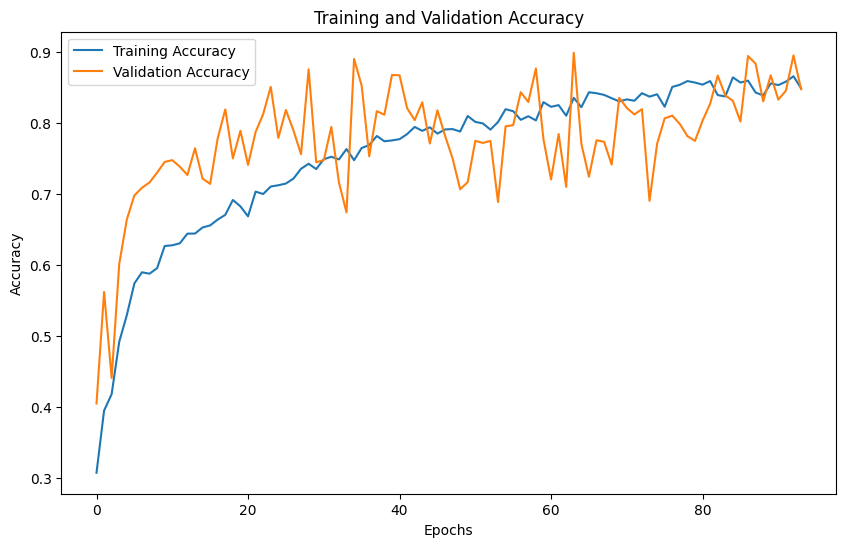

In [ ]:
# Plot training history
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.show()


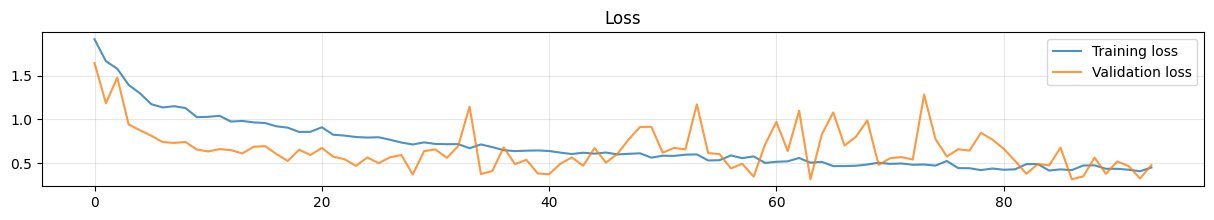

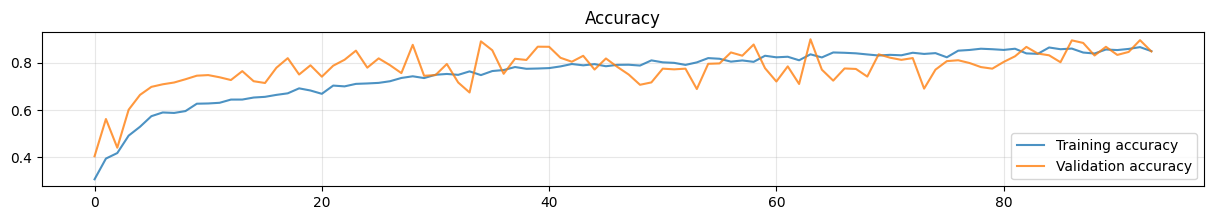

In [ ]:
# Plot training and validation loss
plt.figure(figsize=(15, 2))
plt.plot(history.history['loss'], label='Training loss', alpha=.8)
plt.plot(history.history['val_loss'], label='Validation loss', alpha=.8)
plt.title('Loss')
plt.legend()
plt.grid(alpha=.3)

# Plot training and validation accuracy
plt.figure(figsize=(15, 2))
plt.plot(history.history['accuracy'], label='Training accuracy', alpha=.8)
plt.plot(history.history['val_accuracy'], label='Validation accuracy', alpha=.8)
plt.title('Accuracy')
plt.legend()
plt.grid(alpha=.3)
plt.show()

## 📊 Prepare Your Submission

To prepare your submission, create a `.zip` file that includes all the necessary code to run your model. It **must** include a `model.py` file with the following class:

```python
# file: model.py
class Model:
    def __init__(self):
        """Initialize the internal state of the model."""

    def predict(self, X):
        """Return a numpy array with the labels corresponding to the input X."""
```

The next cell shows an example implementation of the `model.py` file, which includes loading model weights from the `weights.keras` file and conducting predictions on provided input data. The `.zip` file is created and downloaded in the last notebook cell.

❗ Feel free to modify the method implementations to better fit your specific requirements, but please ensure that the class name and method interfaces remain unchanged.

In [ ]:
%%writefile model.py
import numpy as np

import tensorflow as tf
from tensorflow import keras as tfk
from tensorflow.keras import layers as tfkl


class Model:
    def __init__(self):
        """
        Initialize the internal state of the model. Note that the __init__
        method cannot accept any arguments.

        The following is an example loading the weights of a pre-trained
        model.
        """
        self.neural_network = tfk.models.load_model('weights.keras')

    def predict(self, X):
        """
        Predict the labels corresponding to the input X. Note that X is a numpy
        array of shape (n_samples, 96, 96, 3) and the output should be a numpy
        array of shape (n_samples,). Therefore, outputs must no be one-hot
        encoded.

        The following is an example of a prediction from the pre-trained model
        loaded in the __init__ method.
        """
        preds = self.neural_network.predict(X)
        if len(preds.shape) == 2:
            preds = np.argmax(preds, axis=1)
        return preds

Writing model.py


In [ ]:
from datetime import datetime
filename = f'submission_{datetime.now().strftime("%y%m%d_%H%M%S")}.zip'

# Add files to the zip command if needed
!zip {filename} model.py weights.keras

from google.colab import files
files.download(filename)

  adding: model.py (deflated 56%)
  adding: weights.keras (deflated 13%)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>